In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lmfit as lm

In [75]:
dt = 0.1
D = 1.0
L = 11.0
xl = 5.0
xr = 6.0
N = 5
length = 1000000

In [76]:
# generate steps for all particles
steps=np.random.normal(loc=0.0, scale=2*D*dt, size=(N,length))

In [77]:
# initial positions
x = L*np.random.random(size=(N,))

In [78]:
# put initial position in front
x = np.column_stack((x, steps))

In [79]:
# calculate paths
paths = np.mod(np.cumsum(x, axis=1),L)

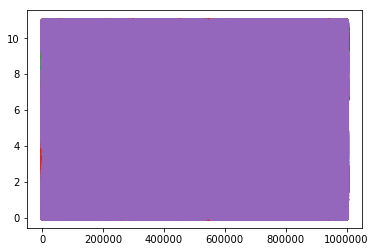

In [80]:
for path in paths:
    plt.plot(path,".")

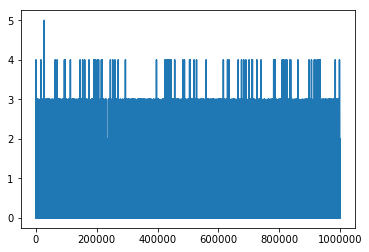

In [81]:
# plot the number of particles in between xl and xr
inbox = np.logical_and(xl<paths,paths<xr)
intensity = np.sum(inbox, axis=0)
plt.plot(intensity)

In [82]:
# place a Gaussian illumination at x=5.5 with unit variance
from scipy.stats import norm
intensity = norm.pdf(paths, loc=5.5)
intensity = np.sum(intensity, axis=0)

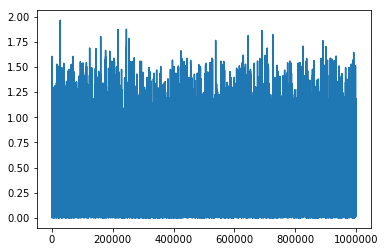

In [83]:
plt.plot(intensity)

1.41100300427


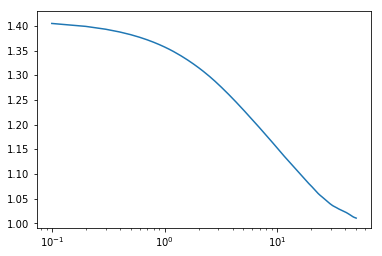

In [106]:
# calculate autocorrelation function
f = np.fft.rfft(intensity)
acf = np.fft.irfft(f * np.conjugate(f))
acf = np.fft.fftshift(acf) / length
autocorr = acf[int(length/2):]/intensity.mean()**2

autocorr = autocorr[:500]
t = np.arange(0,autocorr.size*dt,dt)
plt.semilogx(t,autocorr)
print(autocorr[0])

In [101]:
def corrfit(t,N,D,w0):
    return 1+1/np.sqrt(1+4*D*t/w0**2)/N

In [113]:
corrfit_model=lm.Model(corrfit)
params = corrfit_model.make_params()
params['w0'].set(value=0.5,vary=False)
params['N'].set(value=2,vary=True)
params['D'].set(value=0.1,vary=True)

result = corrfit_model.fit(t=t,data=autocorr,params=params)

In [114]:
print(result.fit_report())

[[Model]]
    Model(corrfit)
[[Fit Statistics]]
    # function evals   = 21
    # data points      = 500
    # variables        = 2
    chi-square         = 0.704
    reduced chi-square = 0.001
    Akaike info crit   = -3276.862
    Bayesian info crit = -3268.432
[[Variables]]
    N:    1.90552157 +/- 0.077345 (4.06%) (init= 2)
    D:    0.10190617 +/- 0.010244 (10.05%) (init= 0.1)
    w0:   0.5 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(N, D)                      = -0.942 



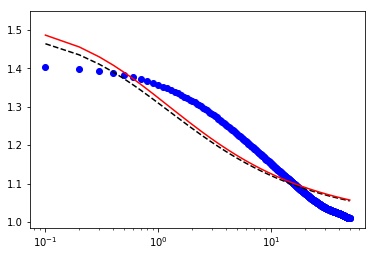

In [115]:
plt.semilogx(t, autocorr,         'bo')
plt.semilogx(t, result.init_fit, 'k--')
plt.semilogx(t, result.best_fit, 'r-')